In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import os
import astropy as asp
from astropy.table import hstack, vstack
import pickle
import tqdm

In [2]:
# folder = 'vdiff_1_28_Rubin_SV_95_-25'
# folder = 'vdiff_1_28_EDFS'
# folder = 'vdiff_1_28'
folder = 'vdiff_2_11'
# folder = 'vdiff_2_11_EDFS'
# folder = 'vdiffbig_multi'

In [19]:
import os

root_dir = f"/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_{folder}"

found_numbers = set()

for entry in os.listdir(root_dir):
    full_path = os.path.join(root_dir, entry)
    if os.path.isdir(full_path):
        try:
            number = int(entry.rsplit("_", 1)[-1])
            found_numbers.add(number)
        except ValueError:
            # folder doesn't end with a number → ignore
            pass

expected_numbers = set(range(0, 1001))
missing_numbers = sorted(expected_numbers - found_numbers)

print("Missing numbers:")
print(missing_numbers)

Missing numbers:
[0]


In [20]:
import os

root_dir = f"/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_{folder}"

dirs_with_fewer_than_3_files = []

for entry in os.listdir(root_dir):
    full_path = os.path.join(root_dir, entry)
    if os.path.isdir(full_path):
        files = [
            f for f in os.listdir(full_path)
            if os.path.isfile(os.path.join(full_path, f))
        ]
        if len(files) < 3:
            dirs_with_fewer_than_3_files.append((full_path, len(files)))

for d, count in dirs_with_fewer_than_3_files:
    print(f"{d} has {count} files")

In [21]:
COLUMNS = [
    'deblend_nChild',
    'id', 
    'coord_ra', 
    'coord_dec', 
    'base_SdssCentroid_x',
    'base_SdssCentroid_y',
    'base_SdssCentroid_flag',
    'base_SdssShape_xx', 
    'base_SdssShape_yy', 
    'base_SdssShape_xy',
    'base_SdssShape_psf_xx', 
    'base_SdssShape_psf_yy',
    'base_SdssShape_psf_xy',
    'base_SdssShape_flag',
    'modelfit_DoubleShapeletPsfApprox_flag',
    'base_PsfFlux_instFlux',
    'base_PsfFlux_instFluxErr',
    'base_PsfFlux_flag',
    'modelfit_CModel_instFlux', 
    'modelfit_CModel_instFluxErr',
    'modelfit_CModel_flag',
    'ext_gaap_GaapFlux_1_15x_Optimal_instFlux',
    'ext_gaap_GaapFlux_1_15x_Optimal_instFluxErr',
    'ext_gaap_GaapFlux_flag',
    'base_CircularApertureFlux_4_5_instFlux',
    'base_CircularApertureFlux_4_5_instFluxErr',
    'base_CircularApertureFlux_9_0_instFlux',
    'base_CircularApertureFlux_9_0_instFluxErr',
    'base_CircularApertureFlux_25_0_instFlux',
    'base_CircularApertureFlux_25_0_instFluxErr',
    'base_ClassificationSizeExtendedness_flag',
]

PHOT_COLUMNS = [
    'base_PsfFlux_instFlux',
    'base_PsfFlux_instFluxErr',
    'base_PsfFlux_flag',
    'modelfit_CModel_instFlux', 
    'modelfit_CModel_instFluxErr',
    'modelfit_CModel_flag',
    'ext_gaap_GaapFlux_1_15x_Optimal_instFlux',
    'ext_gaap_GaapFlux_1_15x_Optimal_instFluxErr',
    'ext_gaap_GaapFlux_flag',
]

In [22]:
bands = 'ugrizy'
base = f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_{folder}/'
cats_all= []
i = 0
for entry in os.scandir(base):
    if not entry.is_dir():
        continue
    pkl = os.path.join(entry.path, 'ECDFS_sim_meas_forced_s.pkl')
    if not os.path.exists(pkl):
        continue
    try:
        with open(pkl, 'rb') as f:
            cat = pickle.load(f)
        if i % 100 == 0:
            print(i)
            pass
        ## OLD
        # cat_to_stack = []
        # for b in bands:
        #     if b == 'i':
        #         temp = cat[b][COLUMNS]
        #         temp['obs_ind'] = i
        #         temp.rename_columns(PHOT_COLUMNS, [n + f'_{b}' for n in PHOT_COLUMNS])
        #     else:
        #         temp = cat[b][PHOT_COLUMNS]
        #         temp.rename_columns(PHOT_COLUMNS, [n + f'_{b}' for n in PHOT_COLUMNS])
        #     cat_to_stack.append(temp)
        # cats_all.append(hstack(cat_to_stack))
        cats_all.append(cat)
        i += 1
    except (OSError, pickle.PickleError) as e:
        continue
print(i)
full_cats_s = vstack(cats_all)

0
100
200
300
400
500
600
700
800
900
1000


In [9]:
print(full_cats_s.columns)

<TableColumns names=('base_PsfFlux_instFlux_r','base_PsfFlux_instFluxErr_r','base_PsfFlux_flag_r','modelfit_CModel_instFlux_r','modelfit_CModel_instFluxErr_r','modelfit_CModel_flag_r','ext_gaap_GaapFlux_1_15x_Optimal_instFlux_r','ext_gaap_GaapFlux_1_15x_Optimal_instFluxErr_r','ext_gaap_GaapFlux_flag_r','base_PsfFlux_instFlux_u','base_PsfFlux_instFluxErr_u','base_PsfFlux_flag_u','modelfit_CModel_instFlux_u','modelfit_CModel_instFluxErr_u','modelfit_CModel_flag_u','ext_gaap_GaapFlux_1_15x_Optimal_instFlux_u','ext_gaap_GaapFlux_1_15x_Optimal_instFluxErr_u','ext_gaap_GaapFlux_flag_u','base_PsfFlux_instFlux_g','base_PsfFlux_instFluxErr_g','base_PsfFlux_flag_g','modelfit_CModel_instFlux_g','modelfit_CModel_instFluxErr_g','modelfit_CModel_flag_g','ext_gaap_GaapFlux_1_15x_Optimal_instFlux_g','ext_gaap_GaapFlux_1_15x_Optimal_instFluxErr_g','ext_gaap_GaapFlux_flag_g','deblend_nChild','id','coord_ra','coord_dec','base_SdssCentroid_x','base_SdssCentroid_y','base_SdssCentroid_flag','base_SdssShape_

In [23]:
with open(f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/pickles/forced_s_cat_{folder}.pkl', "wb") as f:
    pickle.dump(full_cats_s, f)

In [24]:
bands = 'ugrizy'
base = f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_{folder}/'
cats_all= []
i = 0
for entry in os.scandir(base):
    if not entry.is_dir():
        continue
    pkl = os.path.join(entry.path, 'ECDFS_sim_meas_forced.pkl')
    if not os.path.exists(pkl):
        continue
    try:
        with open(pkl, 'rb') as f:
            cat = pickle.load(f)
        if i % 100 == 0:
            print(i)
            pass
        cat_to_stack = []
        for b in bands:
            if b == 'i':
                temp = cat[b][COLUMNS]
                temp['obs_ind'] = i
                temp.rename_columns(PHOT_COLUMNS, [n + f'_{b}' for n in PHOT_COLUMNS])
            else:
                temp = cat[b][PHOT_COLUMNS]
                temp.rename_columns(PHOT_COLUMNS, [n + f'_{b}' for n in PHOT_COLUMNS])
            cat_to_stack.append(temp)
        cats_all.append(hstack(cat_to_stack))
        i += 1
    except (OSError, pickle.PickleError) as e:
        continue
print(i)
full_cats = vstack(cats_all)

0


KeyboardInterrupt: 

In [ ]:
with open(f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/pickles/forced_cat_{folder}.pkl', "wb") as f:
    pickle.dump(full_cats, f)

In [24]:
bands = 'ugrizy'
base = f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/outputs_{folder}/'
cats_by_band = {b: [] for b in bands}
i_true = 0
for entry in os.scandir(base):
    if not entry.is_dir():
        continue
    pkl = os.path.join(entry.path, 'ECDFS_sim_truth.pkl')
    if not os.path.exists(pkl):
        continue
    try:
        with open(pkl, 'rb') as f:
            cat = pickle.load(f)
        if i_true % 100 == 0:
            print(i_true)
        for b in bands:
            # cat[b]['obs_ind'] = i_true
            cats_by_band[b].append(cat[b])
        i_true += 1
    except (OSError, pickle.PickleError) as e:
        continue
print(i_true)
true_cats = {
    b: asp.table.vstack(cats_by_band[b])
    for b in bands
}


0


100
200
300
400
500
600
700
800
900
1000


In [25]:
with open(f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/pickles/true_cat_{folder}.pkl', "wb") as f:
    pickle.dump(true_cats, f)

In [3]:
# with open(f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/pickles/forced_cat_{folder}.pkl', "rb") as f:
#     full_cats = pickle.load(f)
with open(f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/pickles/true_cat_{folder}.pkl', "rb") as f:
    true_cats = pickle.load(f)
with open(f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/pickles/forced_s_cat_{folder}.pkl', "rb") as f:
    full_cats_s = pickle.load(f)
# with open(f'/hildafs/home/pladuca/main/lsst-sim-package/LSST-SimCatVal/LSST-SimCatVal/pickles/true_cat_vdiffnew.pkl', "rb") as f:
#     true_cats_n = pickle.load(f)

In [4]:
# area = (max(full_cats['obs_ind'])) * (900 * 0.2/60) **2
t_area = (max(true_cats['i']['obs_ind'])) * (900 * 0.2/60) **2
s_area = (max(full_cats_s['obs_ind'])) * (900 * 0.2/60) **2

In [5]:
def get_stellar_locust(cat):
    temp = cat
    temp = temp[(temp['deblend_nChild'] == 0) &
        (temp['base_SdssShape_flag'] == False) &
        (temp['modelfit_CModel_instFlux_i'] >= 0) &
        (temp['modelfit_CModel_flag_i'] == False) &
        (temp['base_SdssCentroid_flag'] == False) ]
    print(len(temp))
    temp = temp[(temp['in_img'] == True)]
    print(len(temp))
    temp = temp[(temp['base_PsfFlux_instFlux_i']/temp['base_PsfFlux_instFluxErr_i'] >= 10)]
    mag = -2.5 * np.log10(temp['modelfit_CModel_instFlux_i']) + 31.4
    size = (temp['base_SdssShape_xx']*temp['base_SdssShape_yy'] - temp['base_SdssShape_xy']**2)**0.25
    
    up = 2.25
    down = 1.95
    cut = 21.5
    # up = 2.3
    # down = 2
    # cut = 21

    plt.scatter(mag, size, s=0.5, alpha=0.5)
    plt.axhline(up, c='r')
    plt.axhline(down, c='r')
    plt.axvline(cut, c='r')
    plt.ylim(1,3)
    plt.xlim(13,28)
    stars = temp[(mag < cut) & (size < up) & (size > down)]
    gals = temp[(size >= up)]
    return stars, gals

323481
320902


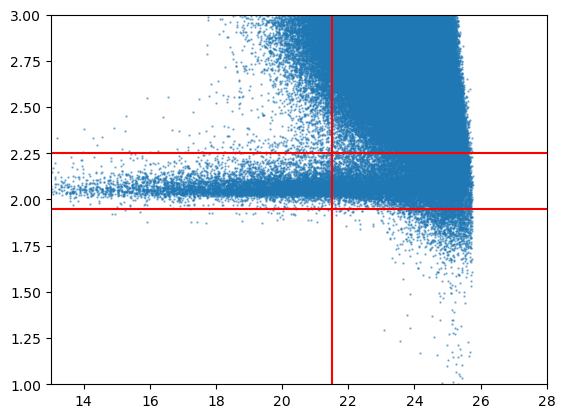

In [6]:
# stars, gals = get_stellar_locust(full_cats)
stars_, gals_ = get_stellar_locust(full_cats_s)

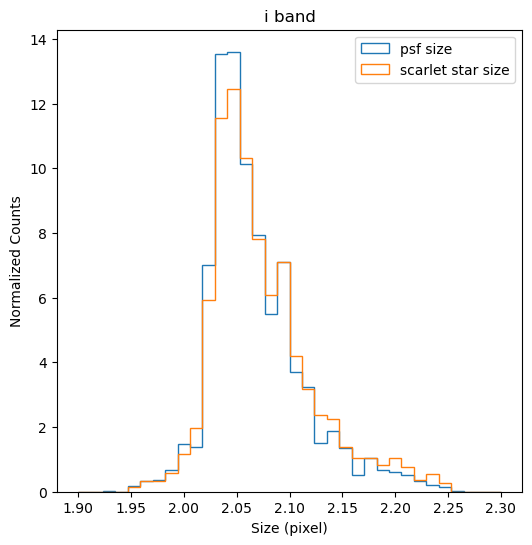

In [7]:
size_bins = np.linspace(1.9,2.3,35)
bin_size = size_bins[1] - size_bins[0]
# star_size = (stars['base_SdssShape_xx']*stars['base_SdssShape_yy'] - stars['base_SdssShape_xy']**2)**0.25
# star_psf = (stars['base_SdssShape_psf_xx']*stars['base_SdssShape_psf_yy'] - stars['base_SdssShape_psf_xy']**2)**0.25
star_size_ = (stars_['base_SdssShape_xx']*stars_['base_SdssShape_yy'] - stars_['base_SdssShape_xy']**2)**0.25
star_psf_ = (stars_['base_SdssShape_psf_xx']*stars_['base_SdssShape_psf_yy'] - stars_['base_SdssShape_psf_xy']**2)**0.25

fig, ax = plt.subplots(figsize=(6,6))
plt.hist(star_psf_,size_bins,density=True, histtype="step", label="psf size")
# plt.hist(star_size, size_bins,density=True, histtype="step", label="default star size")
plt.hist(star_size_,size_bins,density=True, histtype="step", label="scarlet star size")

plt.xlabel('Size (pixel)')
plt.ylabel('Normalized Counts')
plt.title(f'i band')
plt.legend()

plt.show()

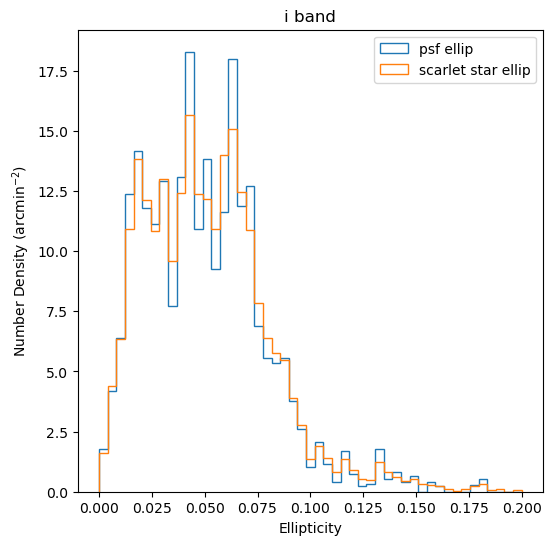

In [8]:
# e1 = (stars['base_SdssShape_xx'] - stars['base_SdssShape_yy'])/(stars['base_SdssShape_xx'] + stars['base_SdssShape_yy'])
# e2 = 2*(stars['base_SdssShape_xy'])/(stars['base_SdssShape_xx'] + stars['base_SdssShape_yy'])
# ellip = np.sqrt((e1)**2 + (e2)**2)

e1_ = (stars_['base_SdssShape_xx'] - stars_['base_SdssShape_yy'])/(stars_['base_SdssShape_xx'] + stars_['base_SdssShape_yy'])
e2_ = 2*(stars_['base_SdssShape_xy'])/(stars_['base_SdssShape_xx'] + stars_['base_SdssShape_yy'])
ellip_ = np.sqrt((e1_)**2 + (e2_)**2)

e1_ = (stars_['base_SdssShape_psf_xx'] - stars_['base_SdssShape_psf_yy'])/(stars_['base_SdssShape_psf_xx'] + stars_['base_SdssShape_psf_yy'])
e2_ = 2*(stars_['base_SdssShape_psf_xy'])/(stars_['base_SdssShape_psf_xx'] + stars_['base_SdssShape_psf_yy'])
ellip_psf = np.sqrt((e1_)**2 + (e2_)**2)

ellip_bins = np.linspace(0,0.2,50)
bin_size = ellip_bins[1] - ellip_bins[0]

fig, ax = plt.subplots(figsize=(6,6))
plt.hist(ellip_psf, ellip_bins, density=True, histtype="step", label="psf ellip")
# plt.hist(ellip, ellip_bins, density=True, histtype="step", label="default star ellip")
plt.hist(ellip_, ellip_bins, density=True, histtype="step", label="scarlet star ellip")

plt.xlabel('Ellipticity')
plt.ylabel('Number Density (arcmin$^{-2}$)')
plt.legend()
plt.title(f'i band')
# plt.grid()
# plt.yscale('log')
plt.show()

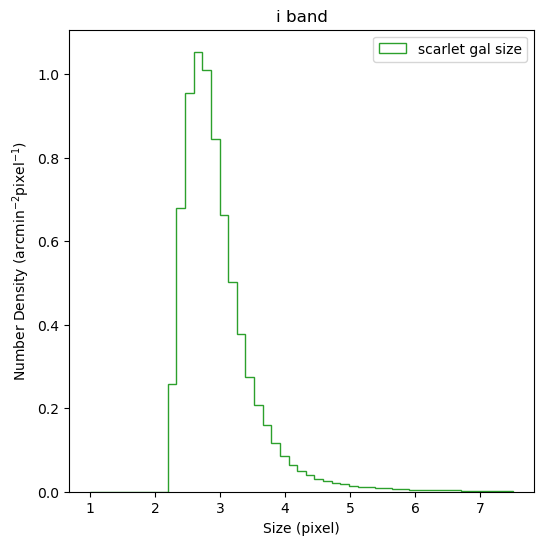

In [9]:
size_bins = np.linspace(1,7.5,50)
# gal_size = (gals['base_SdssShape_xx']*gals['base_SdssShape_yy'] - gals['base_SdssShape_xy']**2)**0.25
gal_size_ = (gals_['base_SdssShape_xx']*gals_['base_SdssShape_yy'] - gals_['base_SdssShape_xy']**2)**0.25

bin_size = size_bins[1] - size_bins[0]

fig, ax = plt.subplots(figsize=(6,6))
# plt.hist(gal_size, size_bins, density=True, histtype="step", label="default gal size", color='C1')
plt.hist(gal_size_, size_bins, density=True, histtype="step", label="scarlet gal size", color='C2')
plt.xlabel('Size (pixel)')
plt.ylabel('Number Density (arcmin$^{-2} $pixel$^{-1}$)')
plt.legend()
plt.title(f'i band')
# plt.grid()
# plt.yscale('log')
plt.show()

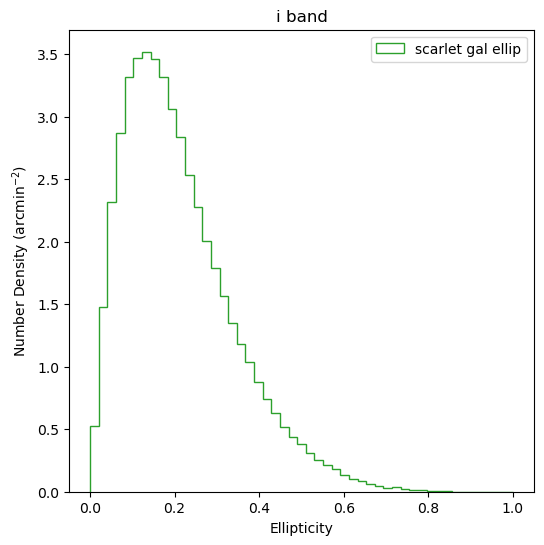

In [10]:
# e1 = (gals['base_SdssShape_xx'] - gals['base_SdssShape_yy'])/(gals['base_SdssShape_xx'] + gals['base_SdssShape_yy'])
# e2 = 2*(gals['base_SdssShape_xy'])/(gals['base_SdssShape_xx'] + gals['base_SdssShape_yy'])
# ellip = np.sqrt((e1)**2 + (e2)**2)

e1_ = (gals_['base_SdssShape_xx'] - gals_['base_SdssShape_yy'])/(gals_['base_SdssShape_xx'] + gals_['base_SdssShape_yy'])
e2_ = 2*(gals_['base_SdssShape_xy'])/(gals_['base_SdssShape_xx'] + gals_['base_SdssShape_yy'])
ellip_ = np.sqrt((e1_)**2 + (e2_)**2)

ellip_bins = np.linspace(0,1,50)
bin_size = ellip_bins[1] - ellip_bins[0]
fig, ax = plt.subplots(figsize=(6,6))
# plt.hist(ellip, ellip_bins, density=True, histtype="step", label="default gal ellip", color='C1')
plt.hist(ellip_, ellip_bins, density=True, histtype="step", label="scarlet gal ellip", color='C2')

plt.xlabel('Ellipticity')
plt.ylabel('Number Density (arcmin$^{-2}$)')
plt.legend()
plt.title(f'i band')
# plt.grid()
# plt.yscale('log')
plt.show()

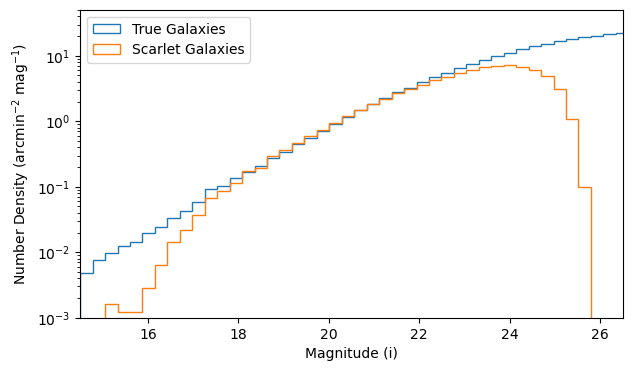

In [11]:
# gal_meas = gals[(gals['base_PsfFlux_instFlux_i']/gals['base_PsfFlux_instFluxErr_i'] >= 10)]
gal_meas_ = gals_[(gals_['base_PsfFlux_instFlux_i']/gals_['base_PsfFlux_instFluxErr_i'] >= 10)]

gal_true = true_cats['i'][(true_cats['i']['ob_type'] == 'diff_galaxy') & (true_cats['i']['in_img'] == True)]

mag_bins = np.linspace(14.5, 28, 50)
bin_size = mag_bins[1] - mag_bins[0]
fig, ax = plt.subplots(1,figsize=(7,4))

# cut_sim_mag = -2.5 * np.log10(gal_meas['modelfit_CModel_instFlux_i']) + 31.4
# sim_weight = np.full_like(cut_sim_mag, 1/(area*bin_size))
cut_sim_mag_n = -2.5 * np.log10(gal_meas_['modelfit_CModel_instFlux_i']) + 31.4
sim_weight_n = np.full_like(cut_sim_mag_n, 1/(s_area*bin_size))
true_mag = -2.5* np.log10(gal_true['flux']) + 31.4
true_weight = np.full_like(true_mag, 1/(t_area*bin_size))

# ghist_dp1, bins, _ =ax.hist(dp1['mag'], dp1['bins'], weights=dp1['weights'], histtype="step",label="Galaxies ECDFS")
# ghist_sim, bins, _ =ax.hist(cut_sim_mag, mag_bins, weights=sim_weight, histtype="step",label='Galaxies Sim')
# ghist_sim, bins, _ =ax.hist(true_mag, mag_bins, weights=true_weight, histtype="step",label='Galaxies Sim True')
ghist_sim, bins, _ =ax.hist(true_mag, mag_bins,weights=true_weight, histtype="step",label='True Galaxies')
# ghist_sim, bins, _ =ax.hist(cut_sim_mag, mag_bins,weights=sim_weight, histtype="step",label='Default Galaxies')
ghist_sim, bins, _ =ax.hist(cut_sim_mag_n, mag_bins,weights=sim_weight_n, histtype="step",label='Scarlet Galaxies')
ax.set_xlabel("Magnitude (i)")
ax.set_ylabel("Number Density (arcmin$^{-2}$ mag$^{-1}$)")
ax.set_yscale('log')
ax.legend()
ax.set_xlim(14.5,26.5)
ax.set_ylim(10e-4)
plt.show()

In [12]:
true_cats['i']['idx'] = np.arange(len(true_cats['i']))
cat = full_cats_s
base_cuts = ((cat['deblend_nChild'] == 0) &
        (cat['base_SdssShape_flag'] == False) &
        (cat['modelfit_CModel_instFlux_i'] >= 0) &
        (cat['modelfit_CModel_flag_i'] == False) &
        (cat['base_SdssCentroid_flag'] == False) & 
        (cat['in_img'] == True))
obs = set(cat['obs_ind'])
match_trues = []
cat_cut = cat[base_cuts]
true_i = true_cats['i']
for o in obs:
    temp_cat = cat_cut[cat_cut['obs_ind'] == o]
    temp_true = true_i[true_i['obs_ind'] == o]

    mags = -2.5*np.log10(temp_cat['modelfit_CModel_instFlux_i']) + 31.4
    mag_lim = np.percentile(mags, 95) + 1 ## arbitrary, if a mag estimate is off by more than 2 bad, use 1.5?
    t_mcut = (-2.5*np.log10(temp_true['flux']) + 31.4) < mag_lim

    match_cat = temp_true[t_mcut]
    match_cat['in_obs_id'] = np.arange(len(match_cat))
    match_trues.append(match_cat)
match_trues = vstack(match_trues)
match_trues
match_trues['str_id'] = [str(a) + '_' + str(b) for a, b in zip(match_trues['in_obs_id'], match_trues['obs_ind'])]# finish this matching
gal_match = gal_meas_[(gal_meas_['match'] == True)]
gal_match['str_id'] = [str(a) + '_' + str(b) for a, b in zip(gal_match['match_id'], gal_match['obs_ind'])]
lookup = dict(zip(match_trues['str_id'], match_trues['idx']))
final_inds = []
valid = []
for sid in gal_match['str_id']:
    if sid in lookup:
        final_inds.append(lookup[sid])
        valid.append(True)
    else:
        valid.append(False)

In [13]:
temp_true_i = true_cats['i'][(true_cats['i']['in_img'] == True)]
temp_true_z = true_cats['z'][(true_cats['z']['in_img'] == True)]
temp_true_r = true_cats['r'][(true_cats['r']['in_img'] == True)]

temp_true_i['flux_z'] = temp_true_z['flux']
temp_true_i['flux_r'] = temp_true_r['flux']

lookup2 = {id_val: i for i, id_val in enumerate(temp_true_i['idx'])}
valid2 = [i in lookup2.keys() for i in final_inds]
final_inds = np.array(final_inds)
new_final = [lookup2[i] for i in final_inds[np.array(valid2)]]
temp_true_i = temp_true_i[new_final]
gal_match = gal_match[valid][valid2]
print(len(temp_true_i), len(gal_match))

205654 205654


In [44]:
tmag_i = -2.5*np.log10(temp_true_i['flux']) + 31.4
tmag_z = -2.5*np.log10(temp_true_i['flux_z']) + 31.4
tmag_r = -2.5*np.log10(temp_true_i['flux_r']) + 31.4

mag_z = -2.5 * np.log10(gal_match['ext_gaap_GaapFlux_1_15x_Optimal_instFlux_z']) + 31.4
mag_i = -2.5 * np.log10(gal_match['ext_gaap_GaapFlux_1_15x_Optimal_instFlux_i']) + 31.4
mag_r = -2.5 * np.log10(gal_match['ext_gaap_GaapFlux_1_15x_Optimal_instFlux_r']) + 31.4

mag_zerr = 2.5 * gal_match['ext_gaap_GaapFlux_1_15x_Optimal_instFluxErr_z'] / (gal_match['ext_gaap_GaapFlux_1_15x_Optimal_instFlux_z'] * np.log(10))
mag_ierr = 2.5 * gal_match['ext_gaap_GaapFlux_1_15x_Optimal_instFluxErr_i'] / (gal_match['ext_gaap_GaapFlux_1_15x_Optimal_instFlux_i'] * np.log(10))
mag_rerr = 2.5 * gal_match['ext_gaap_GaapFlux_1_15x_Optimal_instFluxErr_r'] / (gal_match['ext_gaap_GaapFlux_1_15x_Optimal_instFlux_r'] * np.log(10))

final_mask = ~np.isnan(mag_z) & ~np.isnan(mag_r) & (mag_z < 24) & (mag_r < 24) & (mag_i < 24) # use zero point instead
tmag_i = tmag_i[final_mask]
tmag_z = tmag_z[final_mask]
tmag_r = tmag_r[final_mask]
mag_z = mag_z[final_mask]
mag_i = mag_i[final_mask]
mag_r = mag_r[final_mask]
mag_zerr = mag_zerr[final_mask]
mag_ierr = mag_ierr[final_mask]
mag_rerr = mag_rerr[final_mask]
temp_true_i_filt = temp_true_i[final_mask]
gal_match_filt = gal_match[final_mask]

/tmp/ipykernel_3157994/2247900587.py:5: RuntimeWarning: divide by zero encountered in log10
  mag_z = -2.5 * np.log10(gal_match['ext_gaap_GaapFlux_1_15x_Optimal_instFlux_z']) + 31.4
/tmp/ipykernel_3157994/2247900587.py:5: RuntimeWarning: invalid value encountered in log10
  mag_z = -2.5 * np.log10(gal_match['ext_gaap_GaapFlux_1_15x_Optimal_instFlux_z']) + 31.4
/tmp/ipykernel_3157994/2247900587.py:7: RuntimeWarning: divide by zero encountered in log10
  mag_r = -2.5 * np.log10(gal_match['ext_gaap_GaapFlux_1_15x_Optimal_instFlux_r']) + 31.4
/tmp/ipykernel_3157994/2247900587.py:7: RuntimeWarning: invalid value encountered in log10
  mag_r = -2.5 * np.log10(gal_match['ext_gaap_GaapFlux_1_15x_Optimal_instFlux_r']) + 31.4
/tmp/ipykernel_3157994/2247900587.py:9: RuntimeWarning: divide by zero encountered in divide
  mag_zerr = 2.5 * gal_match['ext_gaap_GaapFlux_1_15x_Optimal_instFluxErr_z'] / (gal_match['ext_gaap_GaapFlux_1_15x_Optimal_instFlux_z'] * np.log(10))
/tmp/ipykernel_3157994/2247900

In [45]:
print(gal_match_filt['match_redshfit'])
print(temp_true_i_filt['redshift'])

   match_redshfit  
-------------------
 0.7241338640416605
 1.0079694918552835
 0.5071734047394961
 0.3927409253663478
0.16246815121024685
 1.1345605850219727
 0.7515424489974976
0.20567591831746193
 0.4830857111979461
 0.8646105527877808
                ...
 1.2147510051727295
 0.3508133888244629
 0.3508133888244629
 0.3508133888244629
 0.2141671707666471
 0.5296852533361701
 0.6763749122619629
 1.1784274578094482
 0.7147644758224487
 0.6405147314071655
Length = 87609 rows
      redshift     
-------------------
 0.7241338640416605
 1.0079694918552835
 0.5071734047394961
 0.3927409253663478
0.16246815121024685
 1.1345605850219727
 0.7515424489974976
0.20567591831746193
 0.4830857111979461
 0.8646105527877808
                ...
 1.2147510051727295
 0.3508133888244629
 0.3508133888244629
 0.3508133888244629
 0.2141671707666471
 0.5296852533361701
 0.6763749122619629
 1.1784274578094482
 0.7147644758224487
 0.6405147314071655
Length = 87609 rows


0.019113478431280587
0.021425315220842213
0.022540816563285417
0.02468351140732089
0.03176285562465118
0.05039954034379262
0.040065890990569765
0.03669752302160305
0.060274850160219114
0.04142371034164333
0.03738463265628547
0.03812004288912018
0.03791494887775268
0.03701792916451656
0.0382388209501104
0.03837873670536756
0.03372458459412506
0.034290079783694354
0.03616774120631359


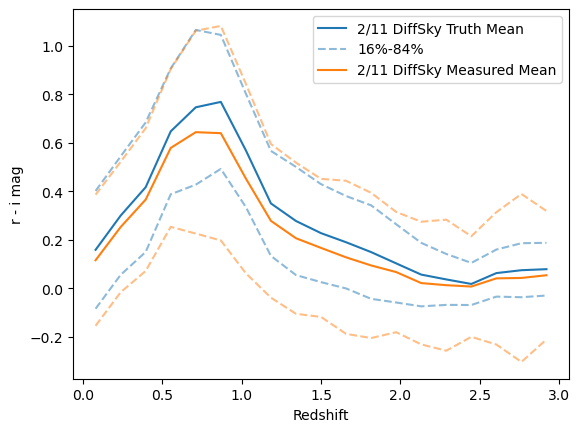

In [ ]:
def percent_bins(x, y, bins, err=None):
    bin_centers = []
    y_means = []
    y_stds = []
    for i in range(len(bins) - 1):
        mask = (x >= bins[i]) & (x < bins[i+1])
        bin_center = 0.5 * (bins[i] + bins[i+1])
        bin_centers.append(bin_center)
        if np.sum(mask) > 0:
            mean = np.mean(y[mask])
            # p84 = np.percentile(y[mask], 84)
            # p16 = np.percentile(y[mask], 16)
            # sig = 0.5 * (p84 - p16)
            sig = np.std(y[mask])
            if err is not None:
                isig = np.sqrt(np.mean(err[mask]**2))
                print(isig)
                sig = np.sqrt(sig**2 + isig**2)
            y_means.append(mean)
            y_stds.append((mean - sig, mean + sig))
        else:
            y_means.append(np.nan)
            y_stds.append((np.nan, np.nan))
            continue
    bin_centers = np.array(bin_centers)
    y_means = np.array(y_means)
    y_stds = np.array(y_stds)
    return bin_centers, y_means, y_stds

fig, ax_top = plt.subplots()

bins = np.linspace(0, 3, 20)

x_d, y_d, percents_d = percent_bins(temp_true_i_filt['redshift'],tmag_r - tmag_i,bins)
ax_top.plot(x_d, y_d, label='2/11 DiffSky Truth Mean',c='C0')
ax_top.plot(x_d, percents_d[:,0], alpha=0.5,ls='--',label='16%-84%',c='C0')
ax_top.plot(x_d, percents_d[:,1],alpha=0.5,ls='--',c='C0')

x_s, y_s, percents_s = percent_bins(gal_match_filt['match_redshfit'],mag_r - mag_i,bins, np.sqrt(mag_rerr**2 + mag_ierr**2))
ax_top.plot(x_s, y_s, label='2/11 DiffSky Measured Mean',c='C1')
ax_top.plot(x_s, percents_s[:,0], alpha=0.5,ls='--',c='C1')
ax_top.plot(x_s, percents_s[:,1],alpha=0.5,ls='--',c='C1')

ax_top.legend()
ax_top.set_xlabel("Redshift")
ax_top.set_ylabel("r - i mag")

plt.show()

0.09447743384708877
0.04562966948955277
0.05813110063816218
0.04104963278686608
0.03719626548944578
0.03755965104368032
0.04950051883567347
0.04704215289512587
0.052967907004899166
0.064825383434833
0.2190153371431945
0.07074007285313387
0.07161693581619533
0.07004004590703714
0.07446354180278687
0.11722775647544488
0.07128348116760128
0.06305181396368223
0.08453505783989634


Text(0, 0.5, 'i - z mag')

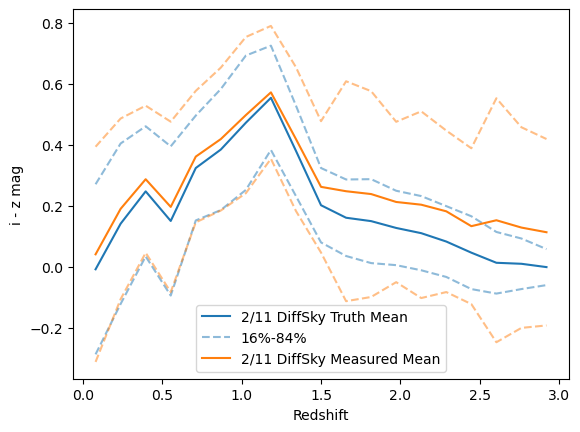

In [48]:
ig, ax_top = plt.subplots()

bins = np.linspace(0, 3, 20)

x_d, y_d, percents_d = percent_bins(temp_true_i_filt['redshift'],tmag_i - tmag_z,bins)
ax_top.plot(x_d, y_d, label='2/11 DiffSky Truth Mean',c='C0')
ax_top.plot(x_d, percents_d[:,0], alpha=0.5,ls='--',label='16%-84%',c='C0')
ax_top.plot(x_d, percents_d[:,1],alpha=0.5,ls='--',c='C0')

x_s, y_s, percents_s = percent_bins(gal_match_filt['match_redshfit'],mag_i - mag_z,bins, np.sqrt(mag_zerr**2 + mag_ierr**2))
ax_top.plot(x_s, y_s, label='2/11 DiffSky Measured Mean',c='C1')
ax_top.plot(x_s, percents_s[:,0], alpha=0.5,ls='--',c='C1')
ax_top.plot(x_s, percents_s[:,1],alpha=0.5,ls='--',c='C1')

ax_top.legend()
ax_top.set_xlabel("Redshift")
ax_top.set_ylabel("i - z mag")

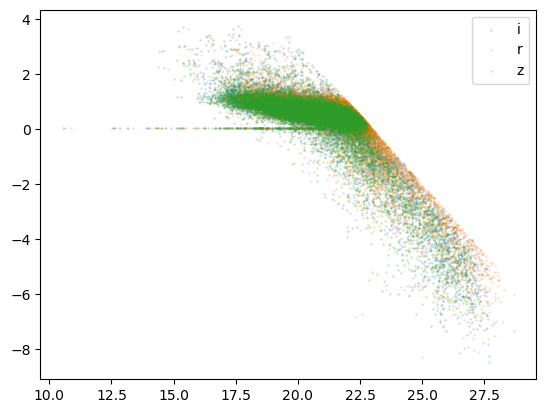

In [18]:
diff_i = mag_i - tmag_i
plt.scatter(tmag_i, diff_i,s=0.1,alpha=0.5,label='i')
diff_r = mag_r - tmag_r
plt.scatter(tmag_r, diff_r,s=0.1,alpha=0.5,label='r')
diff_z = mag_z - tmag_z
plt.scatter(tmag_z, diff_z,s=0.1,alpha=0.5,label='z')
plt.legend()
plt.show()

In [106]:
print(mag_r[(mag_r-tmag_r)>10])
print(tmag_r[(mag_r-tmag_r)>10])

modelfit_CModel_instFlux_r
            ct            
--------------------------
         78.34786517786192
          74.3296924236191
         71.87947779506743
         74.80833296083392
         77.03439504912555
         75.63813780687263
         76.23386634661634
         74.17805711261457
         75.76951773456915
                       ...
         74.64286783760588
         74.02749436296267
         75.05784274561935
          75.7809557591197
          78.1401852042476
         75.37096894329024
         79.11012146926527
         72.83451360340756
         71.19079038721887
         70.52081543868542
Length = 383 rows
      flux_r      
------------------
 24.56317936209619
24.421172044572828
24.962476821241903
25.014289150174967
 24.76252464686413
24.615401553276737
25.336335168972553
25.151701426408337
25.100024870419578
24.348771996755392
               ...
23.800161826495984
 24.79078475796767
25.004463221472356
25.276474347391353
25.452920964985775
24.202251118416026


In [34]:
def gen_mag_plot(b, gals, gals_, true_cats):
    # gal_meas = gals[(gals['base_PsfFlux_instFlux_i']/gals['base_PsfFlux_instFluxErr_i'] >= 10)]
    gal_meas_ = gals_[(gals_['base_PsfFlux_instFlux_i']/gals_['base_PsfFlux_instFluxErr_i'] >= 10)]

    gal_true = true_cats[b][(true_cats[b]['ob_type'] == 'diff_galaxy') & (true_cats[b]['in_img'] == True)]

    mag_bins = np.linspace(14.5, 30, 50)
    bin_size = mag_bins[1] - mag_bins[0]
    fig, ax = plt.subplots(1,figsize=(7,4))

    # cut_sim_mag = -2.5 * np.log10(gal_meas[f'modelfit_CModel_instFlux_{b}']) + 31.4
    # sim_weight = np.full_like(cut_sim_mag, 1/(area*bin_size))
    cut_sim_mag_n = -2.5 * np.log10(gal_meas_[f'modelfit_CModel_instFlux_{b}']) + 31.4
    sim_weight_n = np.full_like(cut_sim_mag_n, 1/(s_area*bin_size))
    true_mag = -2.5* np.log10(gal_true['flux']) + 31.4
    true_weight = np.full_like(true_mag, 1/(t_area*bin_size))

    # ghist_dp1, bins, _ =ax.hist(dp1['mag'], dp1['bins'], weights=dp1['weights'], histtype="step",label="Galaxies ECDFS")
    # ghist_sim, bins, _ =ax.hist(cut_sim_mag, mag_bins, weights=sim_weight, histtype="step",label='Galaxies Sim')
    # ghist_sim, bins, _ =ax.hist(true_mag, mag_bins, weights=true_weight, histtype="step",label='Galaxies Sim True')
    ghist_sim, bins, _ =ax.hist(true_mag, mag_bins,weights=true_weight, histtype="step",label='True Galaxies')
    # ghist_sim, bins, _ =ax.hist(cut_sim_mag, mag_bins,weights=sim_weight, histtype="step",label='Default Galaxies')
    ghist_sim, bins, _ =ax.hist(cut_sim_mag_n, mag_bins,weights=sim_weight_n, histtype="step",label='Scarlet Galaxies')
    plt.title(f'{b} band')
    ax.set_xlabel(f"Magnitude ({b})")
    ax.set_ylabel("Number Density (arcmin$^{-2}$ mag$^{-1}$)")
    ax.set_yscale('log')
    ax.legend()
    ax.set_xlim(14.5,30)
    ax.set_ylim(10e-4)
    plt.show()

/tmp/ipykernel_293849/257640961.py:13: RuntimeWarning: divide by zero encountered in log10
  cut_sim_mag_n = -2.5 * np.log10(gal_meas_[f'modelfit_CModel_instFlux_{b}']) + 31.4
/tmp/ipykernel_293849/257640961.py:13: RuntimeWarning: invalid value encountered in log10
  cut_sim_mag_n = -2.5 * np.log10(gal_meas_[f'modelfit_CModel_instFlux_{b}']) + 31.4


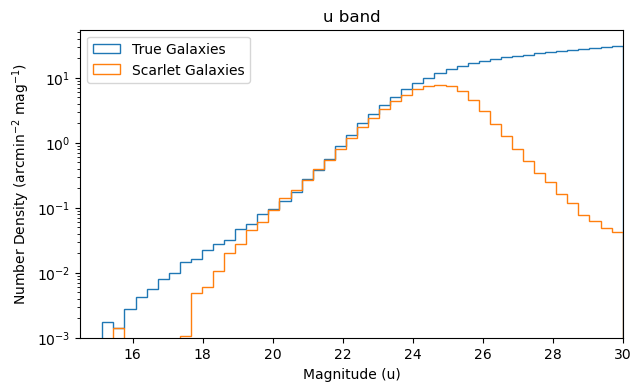

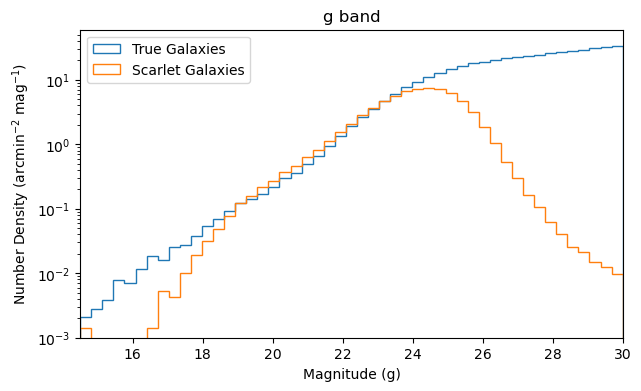

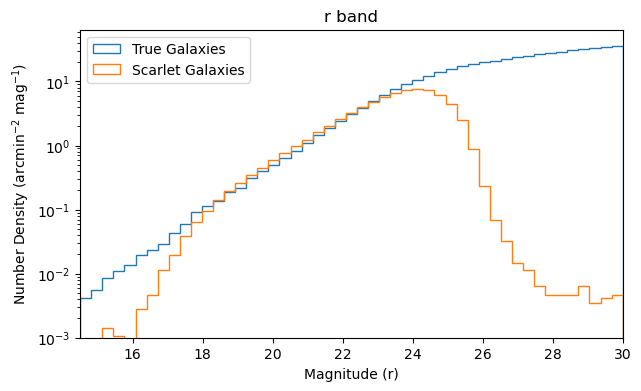

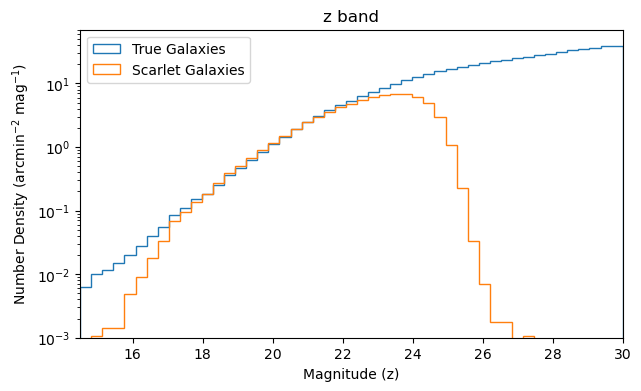

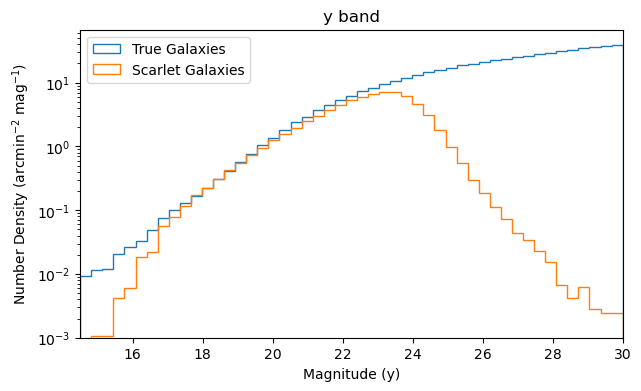

In [35]:
for b in 'ugrzy':
    gen_mag_plot(b, None, gals_, true_cats)